In [42]:
# Importing necessary packages and functions required
import numpy as np # for numerical computations
import pandas as pd # for data processing,I/O file operations
import matplotlib.pyplot as plt # for visualization of different kinds of plots
%matplotlib inline 
# for matplotlib graphs to be included in the notebook, next to the code
import seaborn as sns # for visualization
import warnings # to silence warnings
warnings.filterwarnings('ignore')

In [44]:
# Reading the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [3]:
# examining the response variable
crime[127].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: 127, dtype: float64

<AxesSubplot:>

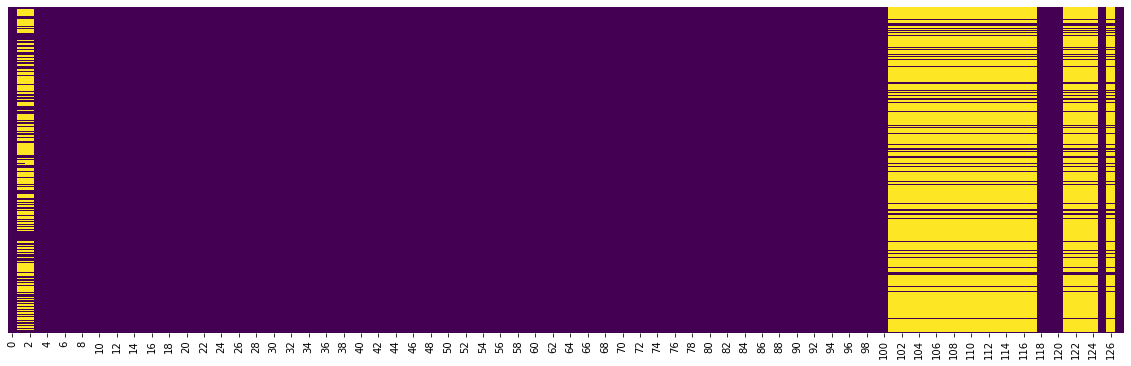

In [4]:
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# remove categorical features
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

In [6]:
# remove rows with any missing values
crime.dropna(inplace=True)

<AxesSubplot:>

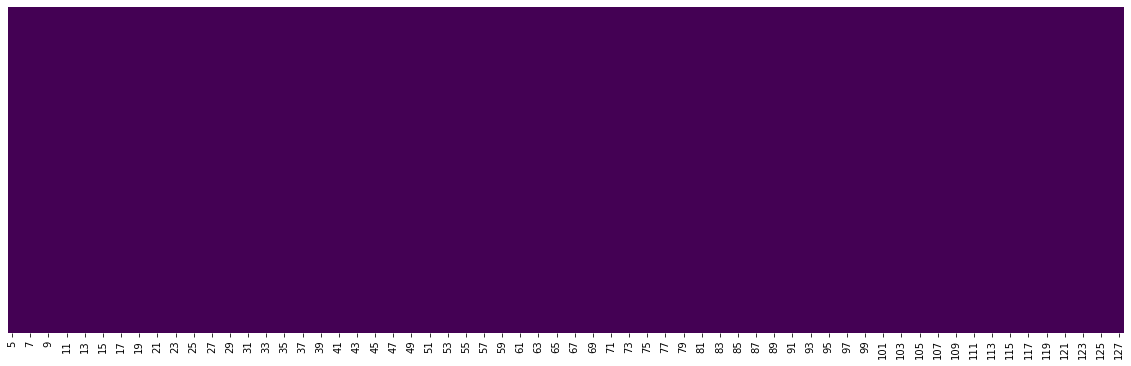

In [7]:
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# checking the shape
crime.shape

(319, 123)

In [9]:
# define X and y
X = crime.drop(127, axis=1)
y = crime[127]

In [10]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

# Regresión lineal

In [12]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [14]:
# Impresión de coeficientes de regresión
print ("INTERCEPT : ",linreg.intercept_)   # Peso del intercepto
print ("CO-EFFICIENTS : ",linreg.coef_)     # Pesos de las variables

INTERCEPT :  0.9922125287584054
CO-EFFICIENT :  [-3.93018330e+00  7.31324716e-01 -3.01181421e-01 -2.96634778e-01
 -1.83170801e-01  2.81575284e-01 -1.48744636e+00 -4.84695533e-01
  1.24104896e+00 -5.32282788e-01  4.64331123e+00 -1.17079618e-01
  1.04229108e+00  1.36950901e-01 -3.12434116e-01 -1.16489196e+00
  5.37252913e-01  7.49655606e-01 -8.02500871e-02  8.42449509e-01
 -1.98951720e-01 -3.17193999e-01 -4.31217869e-01  1.19357660e-01
 -1.83148129e-01  2.11602690e-01 -1.57441950e-01 -1.03051105e+00
  1.49628176e+00  1.86093900e-01 -1.12289917e+00 -1.13107576e-02
  1.22670519e-01  1.46348876e-01 -1.64172731e-01 -3.73690589e-02
  1.92733806e-01  4.34808503e-01  2.32870361e+00 -5.15176228e-01
  2.64683754e+00 -5.48075999e+00  9.63873430e-01 -1.15021921e+00
 -1.15575665e+00  1.10543276e+00  2.41469970e-01 -6.32209680e-01
  6.01741978e-01  8.37645340e-02  1.05006759e-01 -2.58807800e-01
  5.31513493e-01 -8.57090632e-01 -3.29684470e-01  6.61114510e-01
 -5.61884511e-01  6.27806334e-01  2.798480

In [15]:
# make predictions
y_pred = linreg.predict(X_test)

In [16]:
# calculate R^2 value, MAE, MSE, RMSE
from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.19704456295409278
mean_absolute_error : 0.1672515582488834
mean_squared_error :  0.04986345422693394
root_mean_squared_error :  0.22330126337961892


# Regresión Ridge
## alpha: debe ser positivo, aumentar para una mayor regularización

In [17]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.19704456295736772
mean_absolute_error : 0.16725155824834728
mean_squared_error :  0.04986345422673056
root_mean_squared_error :  0.22330126337916353


In [18]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5347697501566352
mean_absolute_error : 0.12769772972161877
mean_squared_error :  0.028890753082631365
root_mean_squared_error :  0.16997280100837123


In [21]:
# examing the coefficients
print ("INTERCEPT : ",ridgereg.intercept_) 
print("CO-EFFICIENTS : ",ridgereg.coef_)

INTERCEPT :  0.7328059146757919
CO-EFFICIENT :  [-5.77226675e-03  2.26721774e-02  4.98857382e-02 -6.70174168e-02
 -1.83566112e-02  5.26888536e-02  1.17689929e-02 -5.72468914e-02
  1.52761058e-03  4.29131248e-02  1.04586550e-04 -1.85621890e-02
  5.07008262e-02 -9.63941391e-02 -1.58499805e-01 -3.28082329e-01
 -1.43015949e-02  8.97253556e-02 -1.10520025e-01  8.02961453e-02
 -2.01498712e-02  7.77242382e-03 -8.07823610e-02 -1.39148634e-01
 -1.19008810e-02  1.00148033e-01  3.61850806e-02 -9.71628046e-02
  6.94268658e-02 -8.81688130e-02 -9.79415666e-02 -4.99145470e-03
  1.28541873e-01 -4.15102106e-02 -1.35952164e-01  4.09752240e-02
  7.00727085e-02 -1.86859042e-02  5.95401646e-02  6.28621417e-02
 -3.91478791e-02  8.48551263e-03  7.31545217e-02 -1.28265573e-01
 -1.22240655e-01 -7.02441332e-02 -7.10900893e-02 -6.33671556e-02
  1.01095274e-01 -5.22454503e-02  1.15465301e-01 -7.35016006e-02
 -4.79847841e-03 -1.10878367e-01  6.49567154e-02  4.12339751e-02
 -1.06606017e-02  1.32494298e-03  1.810638

In [33]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [30]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

1.0

In [31]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.531862346951832
mean_absolute_error : 0.13256644483823563
mean_squared_error :  0.02907130253772355
root_mean_squared_error :  0.1705030865929516


# Regressión Lasso
## alpha: debe ser positivo, aumentar para una mayor regularización

In [35]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print ("INTERCEPT : ",lassoreg.intercept_) 
print("COEFFICIENTS:", lassoreg.coef_)

INTERCEPT :  0.7276989883099099
COEFFICIENTS: [ 0.          0.          0.         -0.25339884  0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.17865705  0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.02230294
 -0.          0.          0.          0.          0.0998841  -0.
  0.         -0.          0.01893786 -0.         -0.03169217  0.
  0.         -0.          0.11479343  0.          0.          0.
  0.         -0.16845012 -0.27294066 -0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.02709397 -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.        

In [36]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print ("INTERCEPT : ",lassoreg.intercept_) 
print("COEFFICIENTS:", lassoreg.coef_)

INTERCEPT :  0.6126454822207839
COEFFICIENTS: [ 0.          0.          0.         -0.04214088  0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.29715868 -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.    

In [37]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.3241322659149899
mean_absolute_error : 0.16889755277533727
mean_squared_error :  0.041971320283970714
root_mean_squared_error :  0.20486903202770962


In [38]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

alpha :  0.0016878682947072093


In [39]:
print ("INTERCEPT : ",lassoregcv.intercept_) 
print("COEFFICIENTS:", lassoregcv.coef_)

INTERCEPT :  0.7085306502300384
COEFFICIENTS: [ 0.          0.          0.         -0.26320105  0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.1285917   0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.11511909  0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.04667596  0.          0.          0.08875875
  0.         -0.09735466 -0.3276063  -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.        

In [40]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5506049113488303
mean_absolute_error : 0.13416628182873494
mean_squared_error :  0.02790739111899851
root_mean_squared_error :  0.1670550541558037
